# 0. Try approaches to find an effective way to merge datasets

In [5]:
# a trial case to load data into Python
import pandas as pd
from pandas.core.computation.check import NUMEXPR_INSTALLED

#file_path = ".././studies/TN_01/TrialNet_01_Data/TN01_ADVERSEEVENTS.CSV"
file_path = "/home/ec2-user/SageMaker/studies/TN_01/TrialNet_01_Data/TN01_nh01_screening.csv"

df1 = pd.read_csv(file_path)
df1.head()

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/tmp/ipykernel_33999/705450557.py:8: DtypeWarning: Columns (46) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(file_path)


,MaskID,Visit_Dt,Visit,Visit_Type,ScreeningDay,ScreeningMonth,ScreeningYear,Age,RelativeWithT1D,DegreeOfRelative_1st,...,clinicalcenternumber,ScreeningSiteName,ScreeningSiteNumber,WhichProtocolVersion,shipspecimencollectionkit,Specimencollectionkitshipmentd,Spring2019ConsentDateMonth,selecttestkittype,Spring2019ConsentDateDay,Spring2019ConsentDateYear
0,200000,06/29/2007,Screening,NaN,29.0,Jun,2007.0,20.0,Yes,0,...,6.0,Ponce School of Medicine,903.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,200003,06/29/2015,Screening,NaN,29.0,Jun,2015.0,20.0,Yes,1,...,NaN,NaN,3017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,200004,08/11/2015,Screening,NaN,11.0,Aug,2015.0,44.0,Yes,1,...,NaN,NaN,3126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,200007,11/21/2016,Screening,NaN,21.0,Nov,2016.0,7.0,Yes,1,...,NaN,NaN,3126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,200010,10/21/2016,Screening,NaN,21.0,Oct,2016.0,34.0,Yes,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234614 entries, 0 to 234613
Data columns (total 66 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   MaskID                            234614 non-null  int64  
 1   Visit_Dt                          234614 non-null  object 
 2   Visit                             234614 non-null  object 
 3   Visit_Type                        4674 non-null    object 
 4   ScreeningDay                      233579 non-null  float64
 5   ScreeningMonth                    233579 non-null  object 
 6   ScreeningYear                     233579 non-null  float64
 7   Age                               233440 non-null  float64
 8   RelativeWithT1D                   233554 non-null  object 
 9   DegreeOfRelative_1st              234614 non-null  int64  
 10  DegreeOfRelative_2ndor3rd         234614 non-null  int64  
 11  HaveDiabetes                      233488 non-null  o

In [20]:
df1.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234614 entries, 0 to 234613
Data columns (total 66 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   MaskID                            234614 non-null  int64  
 1   Visit_Dt                          234614 non-null  object 
 2   Visit                             234614 non-null  object 
 3   Visit_Type                        4674 non-null    object 
 4   ScreeningDay                      233579 non-null  float64
 5   ScreeningMonth                    233579 non-null  object 
 6   ScreeningYear                     233579 non-null  float64
 7   Age                               233440 non-null  float64
 8   RelativeWithT1D                   233554 non-null  object 
 9   DegreeOfRelative_1st              234614 non-null  int64  
 10  DegreeOfRelative_2ndor3rd         234614 non-null  int64  
 11  HaveDiabetes                      233488 non-null  o

# 1. TN_01

## 1.1 Check column headers of all data files

In [1]:
# check column headers for all data files
import pandas as pd
import os

# Directory containing the CSV files
#directory = ".././studies/TN_01/TrialNet_01_Data"
directory = "/home/ec2-user/SageMaker/studies/TN_01/TrialNet_01_Data"

# List to store (file name, column header) tuples
headers_list = []

# Iterate through each CSV file in the directory
for file in os.listdir(directory):
    if file.endswith('.csv'):
        file_path = os.path.join(directory, file)
        
        # Read headers from the CSV file
        with open(file_path, 'r') as f:
            headers = f.readline().strip().split(',')
            headers_list.extend([(file, header) for header in headers])

# Create a DataFrame from the headers list
headers_df = pd.DataFrame(headers_list, columns=['File Name', 'Column Header'])

# Group by 'Column Header' and count the occurrences
header_counts = headers_df['Column Header'].value_counts().reset_index()
header_counts.columns = ['Column Header', 'Header Count']

# Merge the count back into the original DataFrame
headers_df = headers_df.merge(header_counts, on='Column Header')

# Sort the DataFrame by the column header
headers_df = headers_df.sort_values(by='Header Count', ascending=False)

# Display the DataFrame
print(headers_df.info())
headers_df.head(50)

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


<class 'pandas.core.frame.DataFrame'>
Index: 1690 entries, 0 to 307
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   File Name      1690 non-null   object
 1   Column Header  1690 non-null   object
 2   Header Count   1690 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 52.8+ KB
None


,File Name,Column Header,Header Count
0,TN01_additionalconsent.csv,MaskID,32
17,TN01_nh07_changeofstatus.csv,MaskID,32
1,TN01_adverseevents.csv,MaskID,32
30,TN01_researchlabsbaa_cy04_12.csv,MaskID,32
29,TN01_researchlabs_other.csv,MaskID,32
28,TN01_registration.csv,MaskID,32
27,TN01_protocolversion.csv,MaskID,32
26,TN01_protocoldeviation.csv,MaskID,32
25,TN01_permanentsitetransfer.csv,MaskID,32
24,TN01_pathwaytoprevention.csv,MaskID,32


In [2]:
# Specify the desired file name for the CSV, and save the header list to the current working directory
csv_file_name = 'TN_01_column_headers.csv'
headers_df.to_csv(csv_file_name, index=False)

## 1.2 Merging data files 

Because of the concern over the data size to be merged. We divided the total 31 files into 2 parts, merged them separately and then joined them together (if possible). Here are rules for data merging. 1). Outer join based on all shared columns. 2).

In [3]:
import pandas as pd
from pandas.core.computation.check import NUMEXPR_INSTALLED
import glob
import os

def merge_csv_files(file_list):
    # Initialize an empty list to store DataFrames
    dataframes = []

    for file in file_list:
        # Read the CSV file, converting all data to strings
        df = pd.read_csv(file, dtype=str)
        dataframes.append(df)

    # Find common headers among all DataFrames
    common_headers = set.intersection(*[set(df.columns) for df in dataframes])

    # Merge all DataFrames on common headers using outer join
    # Initialize merged DataFrame with the first DataFrame in the list
    merged_df = dataframes[0]

    for idx, df in enumerate(dataframes[1:], start=1):
        # Specify unique suffixes to avoid column name conflicts
        suffix = f'_dup{idx}'
        merged_df = pd.merge(merged_df, df, on=list(common_headers), how='outer', suffixes=('', suffix))

    # Drop columns that are completely duplicated
    merged_df = merged_df.loc[:,~merged_df.columns.duplicated()]

    return merged_df


In [4]:
# Folder path
directory = "/home/ec2-user/SageMaker/studies/TN_01/TrialNet_01_Data"

# List all CSV files in the folder
csv_files = glob.glob(os.path.join(directory, '*.csv'))

In [5]:
# Split the list into 3 parts
#merge data files of the first part
first_part_files = csv_files[:28]
merged_first_part = merge_csv_files(first_part_files)

#save the first merged dataset
merge_data_name_1 = 'TN_01_merged_data_1.csv'
merged_first_part.to_csv(merge_data_name_1, index=False)

print(merged_first_part.info())
merged_first_part.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519750 entries, 0 to 519749
Columns: 1563 entries, MaskID to SignedConsentFor2017Protocol
dtypes: object(1563)
memory usage: 6.1+ GB
None


,MaskID,Visit_Dt,Visit,_22Jul2009VisitType,_15Aug2011VisitType,StorageOfResidualsDuringTrialN,_15Aug2011ConsentForResidualSa,_22Jul2009ConsentSignedDay,_22Jul2009ConsentSignedMonth,_22Jul2009ConsentSignedYear,...,ProtcolDeviationMonth,ProtcolDeviationYear,SubjectRandomizedInelgibilityA,PInotified,ProtocolDeviation,ProtocolDeviationOtherSubcateg,CentralIRBOrlocalIRB_dup26,centralIRBscriteria_dup26,ProtocolVersion_dup27,SignedConsentFor2017Protocol
0,200023,07/01/2015,PRN,NaN,Rescreen/Confirmatory Screening Visit,NaN,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,200071,01/24/2018,PRN,NaN,Rescreen/Confirmatory Screening Visit,NaN,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,200074,04/23/2012,PRN,NaN,Rescreen/Confirmatory Screening Visit,unknown,Unknown,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,200082,03/30/2010,PRN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,200082,06/13/2012,PRN,NaN,Rescreen/Confirmatory Screening Visit,NaN,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#merge data files of the second part
second_part_files = csv_files[28:30]
merged_second_part = merge_csv_files(second_part_files)

#save the second merged dataset
merge_data_name_2 = 'TN_01_merged_data_2.csv'
merged_second_part.to_csv(merge_data_name_2, index=False)

print(merged_second_part.info())
merged_second_part.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747151 entries, 0 to 747150
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   MaskID                         747151 non-null  object
 1   Date_of_Registration           747116 non-null  object
 2   Status                         747116 non-null  object
 3   Date_of_Study_Start            721458 non-null  object
 4   Date_of_Draw                   517567 non-null  object
 5   Event_Title                    517567 non-null  object
 6   Spec_Name                      517567 non-null  object
 7   SampleMaskID                   517567 non-null  object
 8   Test_Name                      517567 non-null  object
 9   Result                         517316 non-null  object
 10  Result_Type                    517560 non-null  object
 11  Visit                          517567 non-null  object
 12  Date_at_Test_Results_Reported  517491 non-nu

,MaskID,Date_of_Registration,Status,Date_of_Study_Start,Date_of_Draw,Event_Title,Spec_Name,SampleMaskID,Test_Name,Result,Result_Type,Visit,Date_at_Test_Results_Reported,Date_at_Evaluation,Date_Received,Date_Shipped,LabID
0,200000,06/29/2007,Registered,06/29/2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,200003,07/03/2015,Eligible,06/29/2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,200004,08/11/2015,Eligible,08/11/2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,200007,11/21/2016,Eligible,11/21/2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,200010,10/21/2016,Eligible,10/21/2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#merge data files of the third part
third_part_files = csv_files[30:]
merged_third_part = merge_csv_files(third_part_files)

#save the third merged dataset
merge_data_name_3 = 'TN_01_merged_data_3.csv'
merged_third_part.to_csv(merge_data_name_3, index=False)

print(merged_third_part.info())
merged_third_part.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1221656 entries, 0 to 1221655
Data columns (total 14 columns):
 #   Column                         Non-Null Count    Dtype 
---  ------                         --------------    ----- 
 0   MaskID                         1221656 non-null  object
 1   Date_of_Draw                   1221656 non-null  object
 2   Event_Title                    1221656 non-null  object
 3   Spec_Name                      1221656 non-null  object
 4   SampleMaskID                   1221656 non-null  object
 5   Test_Name                      1221656 non-null  object
 6   Result                         1214769 non-null  object
 7   Result_Type                    1221179 non-null  object
 8   Visit                          1221656 non-null  object
 9   Date_at_Test_Results_Reported  1220750 non-null  object
 10  Date_at_Evaluation             1221650 non-null  object
 11  Date_Received                  1161357 non-null  object
 12  Date_Shipped                

,MaskID,Date_of_Draw,Event_Title,Spec_Name,SampleMaskID,Test_Name,Result,Result_Type,Visit,Date_at_Test_Results_Reported,Date_at_Evaluation,Date_Received,Date_Shipped,LabID
0,200000,06/29/2007,Screening Specimen Collection,Serum - Autoantibodies,S9527610,GAD65,-.002,RPTD,Screening,07/19/2007,07/19/2007,07/19/2007,06/29/2007,547
1,200000,06/29/2007,Screening Specimen Collection,Serum - Autoantibodies,S9527610,ICA512,.003,RPTD,Screening,07/19/2007,07/19/2007,07/19/2007,06/29/2007,547
2,200000,06/29/2007,Screening Specimen Collection,Serum - Autoantibodies,S9527610,MIAA,-.001,RPTD,Screening,07/19/2007,07/19/2007,07/19/2007,06/29/2007,547
3,200014,10/02/2009,Screening Specimen Collection,Serum - Autoantibodies,S1076701,MIAA,.001,RPTD,Screening,11/04/2009,11/04/2009,11/04/2009,10/28/2009,547
4,200014,10/02/2009,Screening Specimen Collection,Serum - Autoantibodies,S1076701,ICA512,.001,RPTD,Screening,11/04/2009,11/04/2009,11/04/2009,10/28/2009,547


In [8]:
#Clean the each merged dataset by droping columns with only missing values, removing duplicated data points
import pandas as pd
from pandas.core.computation.check import NUMEXPR_INSTALLED
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Load the CSV files
#merged_first_part = pd.read_csv('TN_01_merged_data_1.csv')
#merged_second_part = pd.read_csv('TN_01_merged_data_2.csv')
#merged_third_part = pd.read_csv('TN_01_merged_data_3.csv')
merged_first_part.replace("nan", np.nan, inplace=True)
merged_second_part.replace("nan", np.nan, inplace=True)
merged_third_part.replace("nan", np.nan, inplace=True)

# Function to clean a DataFrame
def clean_dataframe(df):
    # Drop columns where all values are missing
    df = df.dropna(axis=1, how='all')
    # Remove duplicated rows
    df = df.drop_duplicates()
    return df

# Clean each DataFrame
merged_first_part = clean_dataframe(merged_first_part)
merged_second_part = clean_dataframe(merged_second_part)
merged_third_part = clean_dataframe(merged_third_part)


#save to the working folder
#merged_first_part.to_csv('TN_01_merged_data_1.csv', index=False)
#merged_second_part.to_csv('TN_01_merged_data_2.csv', index=False)
#merged_third_part.to_csv('TN_01_merged_data_3.csv', index=False)

In [9]:
#merge the last two merged datasets into one
common_headers_23 = set.intersection(set(merged_second_part.columns), set(merged_third_part.columns))

# Merge the first two DataFrames on common headers using outer join
merged_data_23 = pd.merge(merged_second_part, merged_third_part, on=list(common_headers_23), how='outer', 
                            suffixes=('_dupl_x', '_dupl_y'))

#save the merged dataset into working folder
merged_data_23.to_csv('TN_01_merged_data_23.csv', index=False)

In [10]:
#remove the merged datasets to save space
!rm TN_01_merged_data_2.csv
!rm TN_01_merged_data_3.csv
#!rm TN_01_merged_data_1.csv

##### Try to merge all datasets into one, but failed because of the memory limitation in AWS instance. I tried several approaches to merge them into one: for the string values, transfer them into category data type; for the numerical values, transfer them into sparse data structure. 

### 1.2.1 Data type transformation: string into category, float64 into float16

In [1]:
import pandas as pd
from pandas.core.computation.check import NUMEXPR_INSTALLED
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# The following code is to merge the two datasets for TN_01, but will cause error or dead kernel. 
# Convert the 'ProtocolVersion' column to string in both DataFrames
file_path_1 = "TN_01_merged_data_1.csv"
file_path_2 = "TN_01_merged_data_23.csv"

merged_first_part = pd.read_csv(file_path_1)
merged_data_23 = pd.read_csv(file_path_2)

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
print(merged_first_part.info())
print()
print(merged_data_23.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519750 entries, 0 to 519749
Columns: 1563 entries, MaskID to SignedConsentFor2017Protocol
dtypes: float64(665), int64(1), object(897)
memory usage: 6.1+ GB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968807 entries, 0 to 1968806
Data columns (total 17 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   MaskID                         int64  
 1   Date_of_Registration           object 
 2   Status                         object 
 3   Date_of_Study_Start            object 
 4   Date_of_Draw                   object 
 5   Event_Title                    object 
 6   Spec_Name                      object 
 7   SampleMaskID                   object 
 8   Test_Name                      object 
 9   Result                         object 
 10  Result_Type                    object 
 11  Visit                          object 
 12  Date_at_Test_Results_Reported  object 
 13  Date_at_Ev

In [3]:
print(merged_first_part.memory_usage(deep=True).sum())
print()
print(merged_data_23.memory_usage(deep=True).sum())

17883089368

1802078130


In [4]:
import pandas as pd
import numpy as np

def transform_data_types(df):
    for column in df.columns:
        # Check for NaN values in the column
        has_nan = df[column].isnull().any()

        if df[column].dtype == 'float64':
            # Convert to int16 if all values are integers and there are no NaN values
            if not has_nan and all(df[column].dropna().apply(float.is_integer)):
                df[column] = df[column].astype('int16')
            else:
                # Convert to float16 otherwise
                df[column] = df[column].astype('float16')

        elif df[column].dtype == 'object':
            # Convert string columns to category
            if all(df[column].apply(lambda x: isinstance(x, str) or pd.isnull(x))):
                df[column] = df[column].astype('category')

    return df

In [5]:
transformed_merged_first_part = transform_data_types(merged_first_part)
transformed_merged_second_part = transform_data_types(merged_data_23)

print(transformed_merged_first_part.memory_usage(deep=True).sum())
print()
print(transformed_merged_second_part.memory_usage(deep=True).sum())

1311209169

245206343


In [6]:
print(transformed_merged_first_part.info())
print()
print(transformed_merged_second_part.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519750 entries, 0 to 519749
Columns: 1563 entries, MaskID to SignedConsentFor2017Protocol
dtypes: category(888), float16(665), int64(1), object(9)
memory usage: 1.1+ GB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968807 entries, 0 to 1968806
Data columns (total 17 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   MaskID                         int64   
 1   Date_of_Registration           category
 2   Status                         category
 3   Date_of_Study_Start            category
 4   Date_of_Draw                   category
 5   Event_Title                    category
 6   Spec_Name                      category
 7   SampleMaskID                   category
 8   Test_Name                      category
 9   Result                         object  
 10  Result_Type                    category
 11  Visit                          category
 12  Date_at_Test_Results_Report

#### Data and missing value visualization of the second part of the merged data

In [2]:
!pip install missingno

<Axes: >

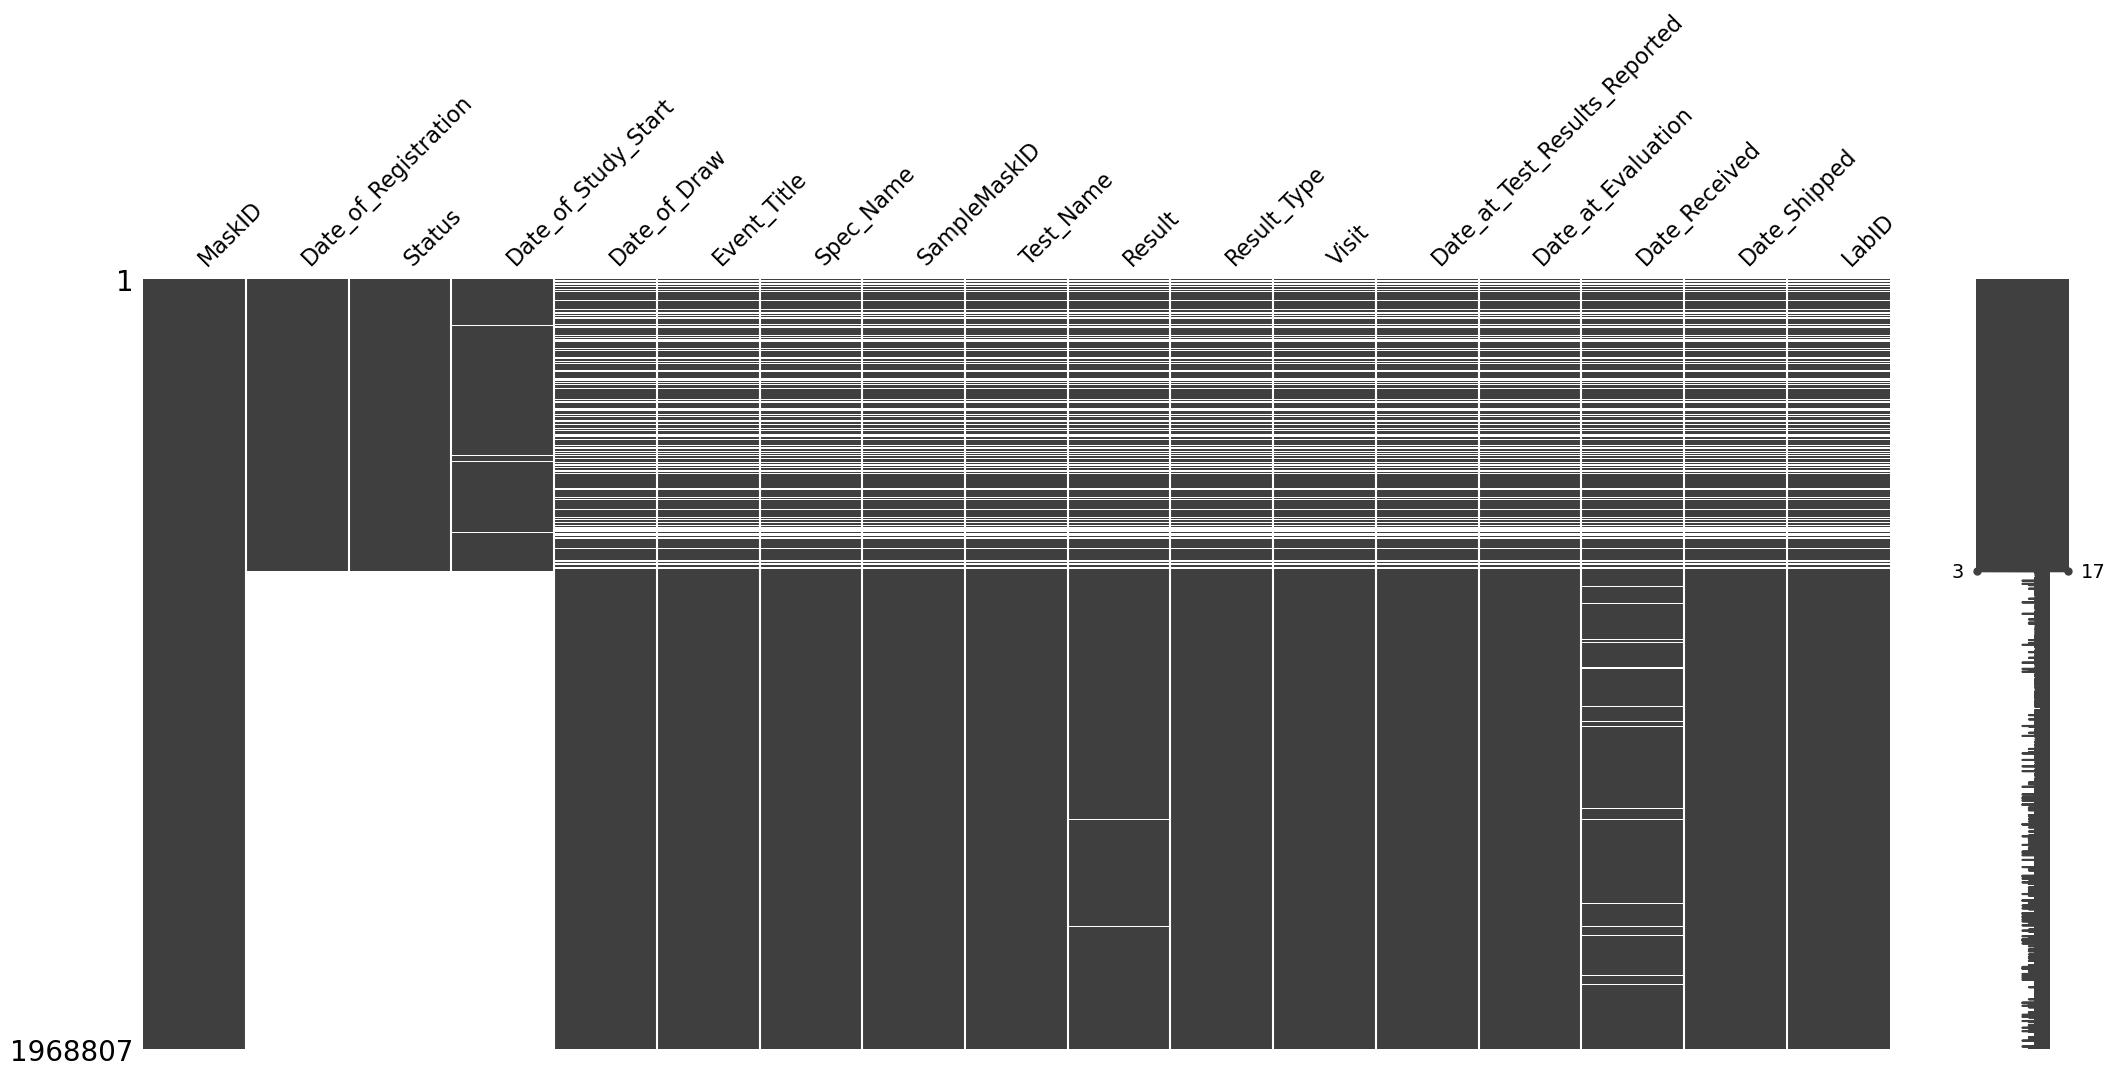

In [7]:
import missingno as msno

msno.matrix(merged_data_23)

In [8]:
merged_data_23.head(10)

,MaskID,Date_of_Registration,Status,Date_of_Study_Start,Date_of_Draw,Event_Title,Spec_Name,SampleMaskID,Test_Name,Result,Result_Type,Visit,Date_at_Test_Results_Reported,Date_at_Evaluation,Date_Received,Date_Shipped,LabID
0,200000,06/29/2007,Registered,06/29/2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,200003,07/03/2015,Eligible,06/29/2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,200004,08/11/2015,Eligible,08/11/2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,200007,11/21/2016,Eligible,11/21/2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,200010,10/21/2016,Eligible,10/21/2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,200014,10/08/2009,Eligible,10/02/2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,200023,04/01/2011,Eligible,04/01/2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,200024,03/21/2006,Registered,03/21/2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,200025,07/17/2005,Registered,07/17/2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,200027,01/23/2009,Eligible,01/12/2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
merged_data_23.tail(10)

,MaskID,Date_of_Registration,Status,Date_of_Study_Start,Date_of_Draw,Event_Title,Spec_Name,SampleMaskID,Test_Name,Result,Result_Type,Visit,Date_at_Test_Results_Reported,Date_at_Evaluation,Date_Received,Date_Shipped,LabID
1968797,999987,NaN,NaN,NaN,11/13/2014,Screening Specimen Collection,Serum - Autoantibodies,S1869249,ZNT8,0.17,RPTD,Screening,12/01/2014,12/03/2014,11/20/2014,11/17/2014,547.0
1968798,999987,NaN,NaN,NaN,11/13/2014,Screening Specimen Collection,Serum - Autoantibodies,S1869249,ICA,20.0,RPTD,Screening,12/09/2014,12/09/2014,NaN,11/17/2014,414.0
1968799,999987,NaN,NaN,NaN,11/13/2014,Screening Specimen Collection,Serum - Autoantibodies,S1869249,IA-2H,293.0,RPTD,Screening,12/01/2014,11/20/2014,11/20/2014,11/17/2014,547.0
1968800,999987,NaN,NaN,NaN,11/13/2014,Screening Specimen Collection,Serum - Autoantibodies,S1869249,GAD65H,20.0,RPTD,Screening,12/01/2014,11/20/2014,11/20/2014,11/17/2014,547.0
1968801,999987,NaN,NaN,NaN,11/13/2014,Screening Specimen Collection,Serum - Autoantibodies,S1869249,MIAA,0.003,RPTD,Screening,12/01/2014,11/20/2014,11/20/2014,11/17/2014,547.0
1968802,999987,NaN,NaN,NaN,12/29/2014,Baseline Specimen Collection,Serum - Autoantibodies,S7034763,MIAA,0.0,RPTD,Baseline,01/20/2015,01/06/2015,01/07/2015,12/29/2014,547.0
1968803,999987,NaN,NaN,NaN,12/29/2014,Baseline Specimen Collection,Serum - Autoantibodies,S7034763,IA-2H,361.0,RPTD,Baseline,01/20/2015,01/06/2015,01/07/2015,12/29/2014,547.0
1968804,999987,NaN,NaN,NaN,12/29/2014,Baseline Specimen Collection,Serum - Autoantibodies,S7034763,ZNT8,0.252,RPTD,Baseline,01/20/2015,01/06/2015,01/07/2015,12/29/2014,547.0
1968805,999987,NaN,NaN,NaN,12/29/2014,Baseline Specimen Collection,Serum - Autoantibodies,S7034763,GAD65H,20.0,RPTD,Baseline,01/20/2015,01/06/2015,01/07/2015,12/29/2014,547.0
1968806,999987,NaN,NaN,NaN,12/29/2014,Baseline Specimen Collection,Serum - Autoantibodies,S7034763,ICA,20.0,RPTD,Baseline,01/12/2015,01/12/2015,NaN,12/29/2014,414.0


### 1.2.2 Data merge into one

In [7]:
common_headers_123 = set.intersection(set(transformed_merged_first_part.columns), set(transformed_merged_second_part.columns))

# Merge the first two DataFrames on common headers using outer join
merged_data_all = pd.merge(transformed_merged_first_part, transformed_merged_second_part, on=list(common_headers_123), how='outer', 
                            suffixes=('_dup_x', '_dup_y'))

print(merged_data_all.info())
merged_data_all.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2923848 entries, 0 to 2923847
Columns: 1578 entries, MaskID to LabID
dtypes: category(900), float16(666), int64(1), object(11)
memory usage: 6.4+ GB
None


,MaskID,Visit_Dt,Visit,_22Jul2009VisitType,_15Aug2011VisitType,StorageOfResidualsDuringTrialN,_15Aug2011ConsentForResidualSa,_22Jul2009ConsentSignedDay,_22Jul2009ConsentSignedMonth,_22Jul2009ConsentSignedYear,...,Spec_Name,SampleMaskID,Test_Name,Result,Result_Type,Date_at_Test_Results_Reported,Date_at_Evaluation,Date_Received,Date_Shipped,LabID
0,200023,07/01/2015,PRN,NaN,Rescreen/Confirmatory Screening Visit,NaN,Yes,NaN,NaN,NaN,...,Serum - Autoantibodies,S3827078,GAD65H,0,RPTD,07/20/2015,07/14/2015,07/14/2015,07/08/2015,547.0
1,200023,07/01/2015,PRN,NaN,Rescreen/Confirmatory Screening Visit,NaN,Yes,NaN,NaN,NaN,...,Serum - Autoantibodies,S3827078,MIAA,0,RPTD,07/20/2015,07/14/2015,07/14/2015,07/08/2015,547.0
2,200023,07/01/2015,PRN,NaN,Rescreen/Confirmatory Screening Visit,NaN,Yes,NaN,NaN,NaN,...,Serum - Autoantibodies,S3827078,IA-2H,0,RPTD,07/20/2015,07/14/2015,07/14/2015,07/08/2015,547.0
3,200071,01/24/2018,PRN,NaN,Rescreen/Confirmatory Screening Visit,NaN,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,200071,01/14/2019,PRN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### The merged dataset is too large to be saved in the working directory. We are to turn columns with numerical values and large portion of missing values into sparse data structure.

### 1.2.3 Overview of merged datasets

In [8]:
import pandas as pd

# Calculate the percentage of missing values
missing_percentage = merged_data_all.isnull().mean() * 100

# Initialize a list to hold the data for the new DataFrame
data = []

# Iterate through each column in the original DataFrame
for column in merged_data_all.columns:
    # Find the top 5 most frequent values (excluding NaN) and their counts
    top_5_values_counts = merged_data_all[column].value_counts(dropna=True).head(5)
    top_5_values = top_5_values_counts.index.tolist()
    top_5_counts = top_5_values_counts.tolist()

    # Ensure the lists have 5 elements by padding with None if necessary
    top_5_values += [None] * (5 - len(top_5_values))
    top_5_counts += [None] * (5 - len(top_5_counts))

    # Determine the data type of the column
    column_dtype = str(merged_data_all[column].dtype)

    # Append the data for this column to the list, including the column name as the first element
    data.append([column, missing_percentage[column], column_dtype] + top_5_values + top_5_counts)

# Define the columns for the new DataFrame, adding 'Column Name' as the first column
columns = ['header', 'Missing Percentage', 'Value Type', 
           'Top 1', 'Top 2', 'Top 3', 'Top 4', 'Top 5',
           'Top 1 Value Count', 'Top 2 Value Count', 'Top 3 Value Count', 
           'Top 4 Value Count', 'Top 5 Value Count']

# Create the new DataFrame
summary_df = pd.DataFrame(data, columns=columns)

# Reset the index of the DataFrame
summary_df.reset_index(drop=True, inplace=True)

# Sort the DataFrame by 'Missing Percentage' in descending order
summary_df = summary_df.sort_values(by='Missing Percentage', ascending=False)

# Save the DataFrame to a CSV file
summary_df.to_csv('merged_data_summary.csv', index=False)

In [9]:
summary_df = pd.read_csv('merged_data_summary.csv')
summary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1578 entries, 0 to 1577
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   header              1578 non-null   object 
 1   Missing Percentage  1578 non-null   float64
 2   Value Type          1578 non-null   object 
 3   Top 1               1577 non-null   object 
 4   Top 2               1192 non-null   object 
 5   Top 3               708 non-null    object 
 6   Top 4               580 non-null    object 
 7   Top 5               526 non-null    object 
 8   Top 1 Value Count   1577 non-null   float64
 9   Top 2 Value Count   1192 non-null   float64
 10  Top 3 Value Count   708 non-null    float64
 11  Top 4 Value Count   580 non-null    float64
 12  Top 5 Value Count   526 non-null    float64
dtypes: float64(6), object(7)
memory usage: 160.4+ KB


### 1.2.4 Numerical data structure transformation

In [10]:
# Filter based on Missing Percentage and Value Type
filtered_columns = summary_df[(summary_df['Missing Percentage'] > 85) & 
                             (summary_df['Value Type'].isin(['float16', 'int64']))]

# Get the list of headers from the filtered DataFrame
headers_with_missing_85 = filtered_columns['header'].tolist()

# Print the count of columns
print("Count of columns with missing Percentage > 85% and Value Type 'float16' or 'int64':", len(headers_with_missing_85))

Count of columns with missing Percentage > 85% and Value Type 'float16' or 'int64': 635


#### Tried many times and found that: 1) for columns with very high missing values, sparse data structure significantly save memory; 2) when missing value less than 85%, sparse data structure does have advantage over float16. 

In [11]:
print(merged_data_all.info())
print()
print(merged_data_all.memory_usage(deep=True).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2923848 entries, 0 to 2923847
Columns: 1578 entries, MaskID to LabID
dtypes: category(900), float16(666), int64(1), object(11)
memory usage: 6.4+ GB
None

7855246123


In [12]:
error_columns = []  # List to store columns that raised errors

for col in headers_with_missing_85:
    try:
        print("Before transformation of", col, ":", merged_data_all[col].memory_usage(deep=True), "bytes")
        
        # Check data type of the column
        col_dtype = merged_data_all[col].dtype

        if col_dtype == 'float16' or col_dtype == 'int64':
            # Convert numeric columns to default sparse type
            merged_data_all[col] = pd.to_numeric(merged_data_all[col], errors='coerce').astype('Sparse')
        # No need to replace the column in the original DataFrame
        # Just printing out the memory usage after transformation
        print("After transformation to Sparse of", col, ":", merged_data_all[col].memory_usage(deep=True), "bytes")
    except ValueError as e:
        print(f"Error converting column {col}: {e}")
        error_columns.append(col)

    print()

# Print out columns that had errors
if error_columns:
    print("Columns with errors:", error_columns)

Before transformation of Thiazolidinediones_dup22 : 5847824 bytes
After transformation to Sparse of Thiazolidinediones_dup22 : 128 bytes

Before transformation of _2cTN18Exclusion_1aAbnormalGluc1 : 5847824 bytes
After transformation to Sparse of _2cTN18Exclusion_1aAbnormalGluc1 : 140 bytes

Before transformation of participantnoteligib_5Forfemales : 5847824 bytes
After transformation to Sparse of participantnoteligib_5Forfemales : 140 bytes

Before transformation of TN22ExclusionCriteri_Historyoftr : 5847824 bytes
After transformation to Sparse of TN22ExclusionCriteri_Historyoftr : 140 bytes

Before transformation of TN22ExclusionCriteri_Historyofre : 5847824 bytes
After transformation to Sparse of TN22ExclusionCriteri_Historyofre : 140 bytes

Before transformation of _2cTN20Exclusion_1DiagnosedwithD : 5847824 bytes
After transformation to Sparse of _2cTN20Exclusion_1DiagnosedwithD : 140 bytes

Before transformation of _2cTN20Exclusion_8Ongoinguseofme : 5847824 bytes
After transformati

In [13]:
print(merged_data_all.info())
print()
print(merged_data_all.memory_usage(deep=True).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2923848 entries, 0 to 2923847
Columns: 1578 entries, MaskID to LabID
dtypes: Sparse[float64, nan](635), category(900), float16(31), int64(1), object(11)
memory usage: 3.0+ GB
None

4248338911


In [14]:
for column in merged_data_all.columns:
    if merged_data_all[column].dtype == 'object':
        merged_data_all[column] = merged_data_all[column].astype('category')

In [16]:
#merged_data_all = merged_data_all.drop('Unnamed: 0', axis=1)

In [17]:
print(merged_data_all.info())
print()
print(merged_data_all.memory_usage(deep=True).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2923848 entries, 0 to 2923847
Columns: 1578 entries, MaskID to LabID
dtypes: Sparse[float64, nan](635), category(911), float16(31), int64(1)
memory usage: 2.8 GB
None

3095289329


In [18]:
test_col = merged_data_all['MaskID']
print(test_col.memory_usage(deep=True))
print()
print(test_col.astype('int16').memory_usage(deep=True))

23390912

5847824


In [ ]:
#turn some float16 to category




In [19]:
import pandas as pd

# Assuming merged_data_all is your DataFrame

def column_memory_usage(df):
    # List to store memory usage and data types
    memory_info = []

    # Iterating through each column to get memory usage and data type
    for col in df.columns:
        memory = df[col].memory_usage(deep=True)
        dtype = df[col].dtype
        memory_info.append({'Column': col, 'Memory Usage (Bytes)': memory, 'Data Type': dtype})

    # Create a DataFrame from the list
    memory_df = pd.DataFrame(memory_info)

    # Sorting by memory usage in descending order
    memory_df = memory_df.sort_values(by='Memory Usage (Bytes)', ascending=False)

    return memory_df

# Call the function and store the result
column_memory_info = column_memory_usage(merged_data_all)

# Display the result
column_memory_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1578 entries, 1569 to 1511
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Column                1578 non-null   object
 1   Memory Usage (Bytes)  1578 non-null   int64 
 2   Data Type             1578 non-null   object
dtypes: int64(1), object(2)
memory usage: 49.3+ KB


In [20]:
column_memory_info.to_csv('TN_01_memory_usage.csv')

In [22]:
merged_data_all.to_csv("TN_01_Merged_Data.csv", index = False)

In [23]:
merged_data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2923848 entries, 0 to 2923847
Columns: 1578 entries, MaskID to LabID
dtypes: Sparse[float64, nan](635), category(911), float16(31), int64(1)
memory usage: 2.8 GB


In [60]:
series = merged_data_all['Race_White']

print(series.memory_usage(deep=True))

#print(series.astype('float64').memory_usage(deep=True))

#print(series.astype('Sparse').memory_usage(deep=True))

#print(series.astype('int16').memory_usage(deep=True))

#print(series.astype('category').memory_usage(deep=True))

5846108


##### Among 1578 headers of merged_first_part, 1281 of them have over 99% of missing values; 149 of them have 95% - 99% missing values; the rest 148 have less than 95% of missing values. Here are a few suggestions for further analyses.

1). drop those collumes with little little values, such as those with missing values larger than 99%.

2). change to another instance with higher memory.

3). merge some columns together based on their similarity.

#### test of merged dataset

In [2]:
string = "D5OtherTestResultDD"  # change this to the string you're searching for
# Convert the search string to lower case (or upper case)
search_string_lower = string.lower()

# Find columns that contain the search string, case-insensitive
matching_columns = [col for col in transformed_merged_data.columns if search_string_lower in col.lower()]
print("Found ", len(matching_columns), "columns: ", matching_columns)

# Create a DataFrame with the filtered columns and drop rows with only missing values
filtered_df = transformed_merged_data[matching_columns].dropna(how='all')
print("DataFrame with filtered columns (rows with all missing values dropped):")
print()
print(filtered_df.info())
#print(filtered_df.head(30))

# Print top 20 values for each matching column
for col in matching_columns:
    print(f"Top 20 values for column {col}:")
    print(transformed_merged_data[col].value_counts().nlargest(30))
    print()

NameError: name 'transformed_merged_data' is not defined

In [34]:
summary_df = pd.read_csv('merged_first_part_summary.csv')

In [12]:
merged_data_23.memory_usage(deep=True)

Index                                  128
MaskID                            15750456
Date_of_Registration              89150884
Status                            88100924
Date_of_Study_Start               88252854
Date_of_Draw                     123874629
Event_Title                      158197379
Spec_Name                        146762318
SampleMaskID                     120396183
Test_Name                        115208219
Result                           109581057
Result_Type                      113438563
Visit                            124265369
Date_at_Test_Results_Reported    123840259
Date_at_Evaluation               123874419
Date_Received                    121761644
Date_Shipped                     123872389
LabID                             17719263
dtype: int64

In [14]:
merged_data_23['Date_of_Registration'] = pd.to_datetime(merged_data_23['Date_of_Registration'], format='%m/%d/%Y')

In [15]:
merged_data_23.memory_usage(deep=True)

Index                                  128
MaskID                            15750456
Date_of_Registration              15750456
Status                            88100924
Date_of_Study_Start               88252854
Date_of_Draw                     123874629
Event_Title                      158197379
Spec_Name                        146762318
SampleMaskID                     120396183
Test_Name                        115208219
Result                           109581057
Result_Type                      113438563
Visit                            124265369
Date_at_Test_Results_Reported    123840259
Date_at_Evaluation               123874419
Date_Received                    121761644
Date_Shipped                     123872389
LabID                             15750456
dtype: int64

In [17]:
merged_data_23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968807 entries, 0 to 1968806
Data columns (total 17 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   MaskID                         int64         
 1   Date_of_Registration           datetime64[ns]
 2   Status                         object        
 3   Date_of_Study_Start            object        
 4   Date_of_Draw                   object        
 5   Event_Title                    object        
 6   Spec_Name                      object        
 7   SampleMaskID                   object        
 8   Test_Name                      object        
 9   Result                         object        
 10  Result_Type                    object        
 11  Visit                          object        
 12  Date_at_Test_Results_Reported  object        
 13  Date_at_Evaluation             object        
 14  Date_Received                  object        
 15  Date_Shipped   

In [15]:
# Check unique value counts. 
unique_counts = merged_data_23.nunique()
unique_counts

MaskID                           237048
Date_of_Registration               5740
Status                                5
Date_of_Study_Start                5863
Date_of_Draw                       5786
Event_Title                          49
Spec_Name                            22
SampleMaskID                     745974
Test_Name                            37
Result                            10241
Result_Type                           3
Visit                                50
Date_at_Test_Results_Reported      4451
Date_at_Evaluation                 4350
Date_Received                      4162
Date_Shipped                       4673
LabID                                32
dtype: int64

# 1.4 Data query

## 1.4.1 check column names and their values containing a string

In [2]:
# The following code is to load the first part of merged dataset
import pandas as pd
from pandas.core.computation.check import NUMEXPR_INSTALLED
import warnings
warnings.filterwarnings('ignore')

merged_first_part = pd.read_csv('TN_01_merged_data_1.csv')

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


Strings in columns that could be merged:
1. testName: 23
2. 
3. D5OtherTestResultDD, D5OtherTestResultMM, D5OtherTestResultYYYY: 3*23
4. 
5. 
6. 
7. 
8. Heightcm, heightin
9. Weightkg, Weightlbs
10.'TimeOfCollectionHH', 'TimeOfCollectionMM'
11.
12.
13. 

In [2]:
merged_first_part.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519673 entries, 0 to 519672
Columns: 1563 entries, Unnamed: 0 to SignedConsentFor2017Protocol
dtypes: float64(664), int64(2), object(897)
memory usage: 6.1+ GB


In [25]:
merged_first_part.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519673 entries, 0 to 519672
Columns: 1563 entries, Unnamed: 0 to SignedConsentFor2017Protocol
dtypes: category(136), float64(664), int64(2), object(761)
memory usage: 5.6+ GB


#### 1) Case insensitive

In [ ]:
string = "D6OtherTestResultUnit"  # change this to the string you're searching for
# Convert the search string to lower case (or upper case)
search_string_lower = string.lower()

# Find columns that contain the search string, case-insensitive
matching_columns = [col for col in merged_first_part.columns if search_string_lower in col.lower()]
print("Found ", len(matching_columns), "columns: ", matching_columns)

# Create a DataFrame with the filtered columns and drop rows with only missing values
filtered_df = merged_first_part[matching_columns].dropna(how='all')
print("DataFrame with filtered columns (rows with all missing values dropped):")
print()
print(filtered_df.info())
#print(filtered_df.head(30))

# Print top 20 values for each matching column
for col in matching_columns:
    print(f"Top 20 values for column {col}:")
    print(merged_first_part[col].value_counts().nlargest(30))
    print()
    

#### 2) Case sensitive

In [ ]:
string = "D5OtherTestResult"  # Change this to the string you're searching for

# Find columns that contain the search string, case-sensitive
matching_columns = [col for col in merged_first_part.columns if string in col]
print("Found ", len(matching_columns), "columns: ", matching_columns)

# Create a DataFrame with the filtered columns and drop rows with only missing values
filtered_df = merged_first_part[matching_columns].dropna(how='all')
print("DataFrame with filtered columns (rows with all missing values dropped):")
print(filtered_df.info())
#print(filtered_df.head(30))

# Print top 20 values for each matching column
for col in matching_columns:
    print(f"Top 20 values for column {col}:")
    print(merged_first_part[col].value_counts().nlargest(20))
    print()


## 1.4.2 check column names and their values containing two strings

Filtered columns:
1. 

In [4]:
# Strings to search for: AND
string1 = ""  # First string
string2 = "heightin"  # Second string, change this to your second string

# Convert the search strings to lower case
search_string1_lower = string1.lower()
search_string2_lower = string2.lower()

# Find columns that contain both search strings, case-insensitive
matching_columns = [col for col in merged_first_part.columns 
                    if search_string1_lower in col.lower() and search_string2_lower in col.lower()]

print("Found ", len(matching_columns), "columns: ", matching_columns)

# Print top 20 values for each matching column
for col in matching_columns:
    print(f"Top 20 values for column {col}:")
    print(merged_first_part[col].value_counts().nlargest(20))
    print()


Found  0 columns:  []


In [ ]:
# Strings to search for: OR
string1 = "heightcm"  # First string
string2 = "heightin"  # Second string, change this to your second string

# Convert the search strings to lower case
search_string1_lower = string1.lower()
search_string2_lower = string2.lower()

# Find columns that contain both search strings, case-insensitive
matching_columns = [col for col in merged_first_part.columns 
                    if search_string1_lower in col.lower() or search_string2_lower in col.lower()]

print("Found ", len(matching_columns), "columns: ", matching_columns)

# Create a DataFrame with the filtered columns and drop rows with only missing values
filtered_df = merged_first_part[matching_columns].dropna(how='all')

# Print top 20 values for each matching column
for col in matching_columns:
    print(f"Top 20 values for column {col}:")
    print(merged_first_part[col].value_counts().nlargest(20))
    print()

In [7]:
filtered_df.describe()

,Heightcm,Heightin,Heightcm_dup14,Heightin_dup14,Heightcm_dup15,Heightin_dup15,Heightcm_dup20,Heightin_dup20,Heightcm_dup21,Heightin_dup21
count,6322.000000,777.000000,470.000000,22.000000,17895.000000,1670.000000,98.000000,26.000000,150.000000,4.000000
mean,145.704470,58.872081,161.463000,59.227273,155.012744,61.237182,166.091327,65.520385,152.980333,59.100000
std,27.089781,11.184336,19.753296,9.314379,25.386499,11.930460,15.612072,6.933721,20.112152,4.313545
min,0.000000,0.000000,39.400000,40.900000,0.000000,0.000000,114.000000,45.000000,97.200000,53.000000
25%,126.500000,51.000000,152.650000,53.035000,141.000000,56.925000,160.225000,63.075000,138.485000,57.875000
50%,151.000000,62.100000,164.700000,61.000000,160.500000,64.000000,167.950000,65.750000,158.200000,60.200000
75%,167.000000,67.000000,175.500000,66.400000,170.700000,68.000000,176.775000,70.922500,167.002500,61.425000
max,219.000000,77.000000,196.170000,72.000000,1658.500000,185.000000,196.100000,75.000000,194.800000,63.000000


## 1.4.3 check column headers in one shared CSV file

In [40]:
import pandas as pd
from pandas.core.computation.check import NUMEXPR_INSTALLED

#file_path = ".././studies/TN_01/TrialNet_01_Data/TN01_ADVERSEEVENTS.CSV"
file_path = "/home/ec2-user/SageMaker/studies/TN_01/TrialNet_01_Data/TN01_nh08_diabonset_current.csv"

df1 = pd.read_csv(file_path)
df1.head()

,MaskID,Visit_Dt,Visit,CriteriaParticipantDiagnosewit,D1FastingPlasmaGlucDD1_1,D1FastingPlasmaGlucMM1_1,D1FastingPlasmaGlucYYYY1_1,D1FastingPlasmaGlucResult1_1,D1FastingPlasmaGlucUnits1_1,D1FastingPlasmaGlucDD2_1,...,D5OtherTestResultYYYY14_1,D5OtherTestResultYYYY15_1,D5OtherTestResultYYYY16_1,D5OtherTestResultYYYY17_1,D5OtherTestResultYYYY18_1,D5OtherTestResultYYYY19_1,D5OtherTestResultYYYY20_1,D5OtherTestResultYYYY21_1,D5OtherTestResultYYYY22_1,D5OtherTestResultYYYY23_1
0,202411,11/06/2018,PRN,b.DKA or unequivocally symptomatic AND one dia...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,202455,10/08/2019,PRN,e.Diagnosis made by criteria other than listed...,16.0,Sep,2019.0,11.6,mmol/L,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,203313,05/19/2020,PRN,e.Diagnosis made by criteria other than listed...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,203899,09/15/2020,PRN,b.DKA or unequivocally symptomatic AND one dia...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,207308,02/04/2019,PRN,a.Two consecutive OGTT clinical alerts,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
string = "MM"  # change this to the string you're searching for
# Convert the search string to lower case (or upper case)
search_string_lower = string.lower()

# Find columns that contain the search string, case-insensitive
matching_columns = [col for col in df1.columns if search_string_lower in col.lower()]
print("Found ", len(matching_columns), "columns: ", matching_columns)


matching_columns2 = ['MaskID', 'Visit_Dt'] + matching_columns
# Create a DataFrame with the filtered columns and drop rows with only missing values
filtered_df = df1[matching_columns2].dropna(how='all', subset=matching_columns)
print("DataFrame with filtered columns (rows with all missing values dropped):")
#print(filtered_df.info())
#print(filtered_df.head(30))

# Print top 20 values for each matching column
for col in matching_columns:
    print(f"Top 20 values for column {col}:")
    print(df1[col].value_counts().nlargest(20))
    print()


In [13]:
# Display the selected rows
filtered_df.head(20)

,MaskID,Visit_Dt,D5MeterReadingLoc1_1,D5MeterReadingDD1_1,D5MeterReadingMM1_1,D5MeterReadingYYYY1_1,D5MeterReadingResult1_1,D5MeterReadingUnit1_1,D5MeterReadingLoc2_1,D5MeterReadingDD2_1,...,D5MeterReadingMM7_1,D5MeterReadingDD5_1,D5MeterReadingDD6_1,D5MeterReadingDD7_1,D5MeterReadingResult5_1,D5MeterReadingResult6_1,D5MeterReadingResult7_1,D5MeterReadingYYYY5_1,D5MeterReadingYYYY6_1,D5MeterReadingYYYY7_1
0,202411,11/06/2018,In Home,26.0,Sep,2018.0,160.0,mg/dl,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,202455,10/08/2019,In Clinic,18.0,Sep,2019.0,12.5,mmol/L,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,203313,05/19/2020,In Home,23.0,Apr,2020.0,22.0,mmol/L,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,216884,07/29/2019,In Clinic,23.0,Jul,2019.0,325.0,mg/dl,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,217158,04/16/2019,In Clinic,26.0,Mar,2019.0,90.0,mg/dl,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,218512,10/26/2020,In Clinic,17.0,Feb,2020.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,231753,11/25/2019,In Home,27.0,Apr,2018.0,138.0,mg/dl,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,242474,07/26/2018,In Home,22.0,Aug,2017.0,307.0,mg/dl,In Clinic,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,247747,04/25/2019,In Home,24.0,Apr,2019.0,13.9,mmol/L,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,248809,10/13/2020,In Home,23.0,Jun,2020.0,7.4,mmol/L,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Save the DataFrame to a CSV file
#filtered_df.to_csv('D5MeterReading_TN01_nh08_diabonset_current.csv')

In [6]:
# Filter the dataframe based on the condition
filtered_rows = filtered_df[filtered_df['D5MeterReadingLoc1_1'] == 'Unknown']

# Display the first 20 rows of the filtered dataframe
filtered_rows.head(20)


,MaskID,Visit_Dt,D5MeterReadingLoc1_1,D5MeterReadingDD1_1,D5MeterReadingMM1_1,D5MeterReadingYYYY1_1,D5MeterReadingResult1_1,D5MeterReadingUnit1_1,D5MeterReadingLoc2_1,D5MeterReadingDD2_1,...,D5MeterReadingMM7_1,D5MeterReadingDD5_1,D5MeterReadingDD6_1,D5MeterReadingDD7_1,D5MeterReadingResult5_1,D5MeterReadingResult6_1,D5MeterReadingResult7_1,D5MeterReadingYYYY5_1,D5MeterReadingYYYY6_1,D5MeterReadingYYYY7_1
32,260645,10/29/2020,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,467630,01/14/2020,Unknown,15.0,Nov,2019.0,17.6,mmol/L,Unknown,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160,518555,06/19/2019,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,529847,01/24/2020,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185,567236,07/18/2018,Unknown,5.0,Jul,2018.0,681.0,mg/dl,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212,600180,08/14/2019,Unknown,1.0,Aug,2019.0,234.0,mg/dl,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
258,698893,02/10/2020,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
